## Viewing the file using Dask

In [1]:
import pandas as pd
file_path='Encounters.csv'


In [2]:
import datetime as dt

In [3]:
import dask.dataframe as dd
df = dd.read_csv(file_path)


In [4]:
df.columns

Index(['PATIENT_ID', 'PROVIDER_IDS', 'PROVIDER_TYPES', 'CARE_SETTING_CATEGORY',
       'ADMIT_DATE', 'DISCHARGE_DATE', 'DISCHARGE_DISPOSITION',
       'OVERDOSE_FLAG', 'OD_DX_DATE', 'OD_NOTE_DATE', 'OD_TERMS',
       'OD_DRUG_TERMS', 'OD_AR_FLAG', 'ADVERSE_OPIOID_EVENT_FLAG',
       'ADVERSE_OPIOID_EVENT_DRUGS', 'ADVERSE_OPIOID_EVENT_PROBLEMS',
       'COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG'],
      dtype='object')

## df is the data frame containing all the data present in the CSV file and below we can see the various columns and datatypes of each column.

In [6]:
df.head()

,PATIENT_ID,PROVIDER_IDS,PROVIDER_TYPES,CARE_SETTING_CATEGORY,ADMIT_DATE,DISCHARGE_DATE,DISCHARGE_DISPOSITION,OVERDOSE_FLAG,OD_DX_DATE,OD_NOTE_DATE,...,OTHERGOV_FLAG,SELFPAY_FLAG,WORKERSCOMP_FLAG,INSTITUTIONALIZED_FLAG,CHARITY_FLAG,MEDICARE_FLAG,MEDICAID_FLAG,LIFE_FLAG,MDWISE_FLAG,NODATA_FLAG
0,591002,NaN,NaN,E,2010-03-08,2010-03-09,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,591002,NaN,NaN,E,2010-03-08,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,591002,NaN,NaN,E,2010-03-12,2010-03-13,NaN,0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
3,591002,NaN,NaN,E,2010-03-12,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,591002,NaN,NaN,E,2010-12-28,2010-12-30,NaN,0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


## Counting the number of visits of Patients based on Admit_Date and Discharge Date

In [18]:
import pandas as pd 
j=[]
file_path='Encounters.csv'
chunksize=30000
d={}
for chunk in pd.read_csv(file_path, low_memory=False, iterator=True, chunksize=chunksize):
    a = chunk[['ADMIT_DATE', 'DISCHARGE_DATE', 'PATIENT_ID','CARE_SETTING_CATEGORY','DISCHARGE_DISPOSITION']]
    b = a[(a['ADMIT_DATE'].notnull()) & (a['ADMIT_DATE']>="2014-10-01") & (a['DISCHARGE_DATE'].notnull()) & (a['DISCHARGE_DATE']>="2014-10-01")]
    #b.reset_index(inplace=True)
    j.extend(b.values)


In [10]:
len(j)

561663

### NEW TASK

## Outgoing category

## Total Number of patients=561663

In [17]:
df = pd.DataFrame(j, columns=['ADMIT_DATE', 'DISCHARGE_DATE', 'PATIENT_ID','CARE_SETTING_CATEGORY','DISCHARGE_DISPOSITION'])

AssertionError: 5 columns passed, passed data had 3 columns

## Took only 3 columns for initial vizualisation

In [14]:
df.head(2093)

,0,1,2
0,8213,56,56
1,11179,85,85
2,13611,41,41
3,22816,160,160
4,23543,6,6
5,23994,60,60
6,24117,1,1
7,28194,8,8
8,28440,63,63
9,36075,63,63


## A basic histogram plot showing the number of visits for patients according to index in the data frame

In [15]:
df.iloc[:10,1].plot.bar()

## Maximum number of visits by any patient

In [16]:
df['ADMIT_DATE'].max()

KeyError: 'ADMIT_DATE'

## Minimum Number of Visits by any patient

In [ ]:
dfObj['ADMIT_DATE'].min()

## Patient id having maximum number of visits --480347

In [ ]:
dfObj.loc[dfObj['ADMIT_DATE'] == 247, 'PATIENT_ID']

## Patient_id and number of visits

In [ ]:
dfObj.groupby(['PATIENT_ID']).sum()

## Average number of visits by patients overall

In [ ]:
dfObj['ADMIT_DATE'].mean()

In [ ]:
dfObj['ADMIT_DATE'].std()

## Median number of visits by patients overall

In [ ]:
dfObj['ADMIT_DATE'].median()

## Histogram Plot for 

In [ ]:
dfObj.hist(column='ADMIT_DATE', bins=100, range=(0, 300))

In [ ]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = dfObj.groupby(['PATIENT_ID']).sum()
# q-q plot
qqplot(data, line='s')
pyplot.show()

## Patient_id with visits more than mean

In [ ]:
dfObj.loc[dfObj['ADMIT_DATE'] > dfObj['ADMIT_DATE'].mean(), 'PATIENT_ID']

## Count Patients with visits more than mean ---- 210253

In [ ]:
dfObj.boxplot(column=['ADMIT_DATE'])

Visualize Outliers using Box Plot

In [ ]:
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
sns.boxplot(x=dfObj['ADMIT_DATE'])

## Z-score

re-scale and center(Normalize) the data and look for data points which are too far from zero(center)
Data far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e
if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [ ]:
z=np.abs(stats.zscore(dfObj))
print(z)

In [ ]:
import numpy as np
k=np.where(z > 3)

The first array contains the list of row numbers and second array respective column numbers of the outliers. Hence, first array gives the list of patient_id identified as outliers in terms of visits to hospital

## Count Number of Outliers ---- 10610

In [ ]:
## Remove Duplicates

k1=k[0]

l1=set(k1)
len(l1)

## Patient_id which are outliers

In [ ]:
print(l1)

In [ ]:
## Overall description

In [ ]:
k1=dfObj['ADMIT_DATE'].describe()
k1=pd.DataFrame(k1)
k1.rename(columns={"ADMIT_DATE": "Count"})

In [ ]:
'PATIENT_ID', 'PROVIDER_IDS', 'PROVIDER_TYPES', 'CARE_SETTING_CATEGORY',
       'ADMIT_DATE', 'DISCHARGE_DATE', 'DISCHARGE_DISPOSITION',
       'OVERDOSE_FLAG', 'OD_DX_DATE', 'OD_NOTE_DATE', 'OD_TERMS',
       'OD_DRUG_TERMS', 'OD_AR_FLAG', 'ADVERSE_OPIOID_EVENT_FLAG',
       'ADVERSE_OPIOID_EVENT_DRUGS', 'ADVERSE_OPIOID_EVENT_PROBLEMS',
       'COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG'

In [ ]:
## take sum --- 'OD_AR_FLAG', 'ADVERSE_OPIOID_EVENT_FLAG'

In [ ]:
import pandas as pd
df_combined= pd.read_csv(file_path, usecols=['OD_AR_FLAG','ADVERSE_OPIOID_EVENT_FLAG'])


In [ ]:
df_combined.head(5)----take only for 0's and 1..ignore NaN

In [ ]:
## take sum --- 'OD_AR_FLAG', 'ADVERSE_OPIOID_EVENT_FLAG'

In [ ]:
import pandas as pd 
j1=[]
file_path='Encounters.csv'
chunksize=30000
d={}


In [ ]:
import pandas as pd
df_prov= pd.read_csv(file_path, usecols=['PROVIDER_TYPES'])


In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np

## Explaination of PROVIDER_TYPES

In [ ]:
df_prov.PROVIDER_TYPES.unique()

In [16]:
df_prov.isnull().sum()

PROVIDER_TYPES    23654148
dtype: int64

In [36]:
def split_val(each):
    each=str(each)
    if each=='nan' or each=='None':
        return 'NA'
    each_list = each.split("|")
    each_list_set=set(each_list)
    if len(each_list_set)==1:
        return each_list[0]
    else:
        if 'NA' in each_list_set:
            each_list=remove_values_from_list(each_list, 'NA')
            return '|'.join(each_list)
                
    
                

In [27]:
split_val('NA|NA|MEDICINE|INFECTIOUS D|INFECTIOUS D|INFECTIOUS DISE|NA')

'MEDICINE|INFECTIOUS D|INFECTIOUS D|INFECTIOUS DISE'

In [37]:
df_prov['PROVIDER_TYPES'] = df_prov['PROVIDER_TYPES'].apply(lambda x: split_val(x))

In [38]:
df_prov.PROVIDER_TYPES.unique()

array(['NA', 'MEDICINE', 'GERIATRIC ME', ...,
       "RADIOLOGY'|RADIOLOGY'|EAR,NOSE&THROAT|EAR,NOSE&THROAT",
       'Allopathic & Osteopathic Physicians : Radiology : Body Imaging',
       'Physician Assistants & Advanced Practice Nursing Providers : Nurse Anethetist, Certified Registered|Allopathic & Osteopathic Physicians : Emergency Medicine'],
      dtype=object)

In [20]:
def remove_values_from_list(the_list, val):
       return [value for value in the_list if value != val]

In [40]:
len(df_prov.PROVIDER_TYPES.unique())

3144

## Explaination of CARE_SETTING_CATEGORY

In [ ]:
CARE_SETTING_CATEGORY_df= pd.read_csv(file_path, usecols=['CARE_SETTING_CATEGORY'])

In [ ]:
df1=CARE_SETTING_CATEGORY_df['CARE_SETTING_CATEGORY'].value_counts()

In [ ]:
df1

##### Percentage of Missing value

In [ ]:
CARE_SETTING_CATEGORY_df.isnull().sum()*100/len(CARE_SETTING_CATEGORY_df)

##### Percentage of each category

outliers per category..

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
distribution of visit

In [ ]:
df1=CARE_SETTING_CATEGORY_df['CARE_SETTING_CATEGORY'].value_counts(normalize=True)*100

In [ ]:
df1=pd.DataFrame(df1)
df1

###  Task 2 Given on 18th November--

How many unique patients each category has

In [ ]:
CARE_SETTING_CATEGORY_patients_df= pd.read_csv(file_path, usecols=['PATIENT_ID','CARE_SETTING_CATEGORY'])

In [ ]:
CARE_SETTING_CATEGORY_patients_df.head(5)

In [ ]:
patient_df_E = CARE_SETTING_CATEGORY_patients_df[CARE_SETTING_CATEGORY_patients_df['CARE_SETTING_CATEGORY']=='E']

### On new Data set

In [ ]:
df_new_sort_E=df_new_sort[df_new_sort['CARE_SETTING_CATEGORY']=='E']

In [ ]:
df_new_sort_E.head()

In [ ]:
df1=df_new_sort['CARE_SETTING_CATEGORY'].value_counts(normalize=True)*100

In [ ]:
patient_list_E=df_new_sort_E['PATIENT_ID'].tolist()

In [ ]:
len(set(patient_list_E))

In [ ]:
df_new_sort_I=df_new_sort[df_new_sort['CARE_SETTING_CATEGORY']=='I']
patient_list_I=df_new_sort_I['PATIENT_ID'].tolist()
len(set(patient_list_I))

### Old Unique Patients for E category ---- 465924

### Old Unique Patients for I category ---- 357034

### Old Unique Patients for O category ---- 604026 

### TASK 1 Given on 18th November--

How many visit each patient had in each category---dummy e.g. how many visits olena has in O,E,I Categories

### Applied One-Hot Encoding to convert categorical variable into zeros or One

In [ ]:
y = pd.get_dummies(df_new_sort,columns = ['CARE_SETTING_CATEGORY'])


In [ ]:
k_df=y.groupby(['PATIENT_ID']).sum()
k_df=k_df.reset_index()

In [ ]:
k_df['CARE_SETTING_CATEGORY_I'].value_counts(normalize=True)*100

In [ ]:
k_df['CARE_SETTING_CATEGORY_I'].mean()

In [ ]:
df_new_sort[df_new_sort['PATIENT_ID']==310928]

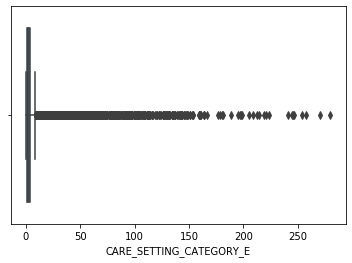

In [90]:
im

In [ ]:
sns.boxplot(x=k_df['CARE_SETTING_CATEGORY_I'])

In [ ]:
z1=np.abs(stats.zscore(k_df['CARE_SETTING_CATEGORY_E']))
import numpy as np
k_E=np.where(z1 > 3)
print(k_E[0])

In [ ]:
len(k_E[0])

In [ ]:
len(k_O[0])

In [95]:
z3=np.abs(stats.zscore(k_df['CARE_SETTING_CATEGORY_E']))
import numpy as np
k_E=np.where(z3 > 3)
print(k_E[0])

[    34     83    400 ... 413461 413463 413506]


In [96]:
len(k_E[0])

6770

## Explaination of DISCHARGE_DISPOSITION per care setting category

In [97]:
DISCHARGE_DISPOSITION_df= pd.read_csv(file_path, usecols=['DISCHARGE_DISPOSITION'])

In [98]:
len(DISCHARGE_DISPOSITION_df.DISCHARGE_DISPOSITION.unique())

91

#####  Percentage of Missing value

In [59]:
DISCHARGE_DISPOSITION_df.isnull().sum()*100/len(DISCHARGE_DISPOSITION_df)

DISCHARGE_DISPOSITION    56.242162
dtype: float64

##### Percentage of each category

In [65]:
df1=DISCHARGE_DISPOSITION_df['DISCHARGE_DISPOSITION'].value_counts(normalize=True)*100

In [ ]:
DISCHARGE_DISPOSITION_df= pd.read_csv(file_path, usecols=['DISCHARGE_DISPOSITION'])

In [35]:
DISCHARGE_DISPOSITION_CS_df= pd.read_csv(file_path, usecols=['CARE_SETTING_CATEGORY','DISCHARGE_DISPOSITION'])

In [49]:
DF_E=DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='E') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']!='NaN')]

In [50]:
len(DF_E)

4474888

In [54]:
DF_I=DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='I') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']!='NaN')]

In [55]:
len(DF_I)

1615511

In [56]:
DF_O=DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='O') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']!='NaN')]

In [57]:
len(DF_O)

24328691

In [37]:
DISCHARGE_DISPOSITION_CS_df.head(100)

,CARE_SETTING_CATEGORY,DISCHARGE_DISPOSITION
0,E,NaN
1,E,NaN
2,E,NaN
3,E,NaN
4,E,NaN
5,E,NaN
6,E,NaN
7,E,NaN
8,E,NaN
9,E,NaN


In [92]:
sol1=DISCHARGE_DISPOSITION_CS_df[DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']=='Kept']  

In [93]:
len(sol1)

160328

In [94]:
discharge_E = DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='E') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']=='Kept')]

In [95]:
len(discharge_E)

20742

In [96]:
# percent

20742*100/160328

12.937228681203532

In [97]:
discharge_I = DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='I') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']=='Kept')]

In [98]:
len(discharge_I)

0

In [99]:
# percent

0*100/160328

0.0

In [100]:
discharge_O = DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='O') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']=='Kept')]

In [101]:
len(discharge_O)

139586

In [102]:
# percent

139586*100/160328

87.06277131879646

In [105]:
E=[20.89297533488701,11.20100250121969,0.57824925481635,12.937228681203532]
I=[4.958978495241195,5.137854703475858,0.4335212219907065,0]
O=[74.14804616987179,83.66114279530446,98.98822952319294,87.06277131879646]

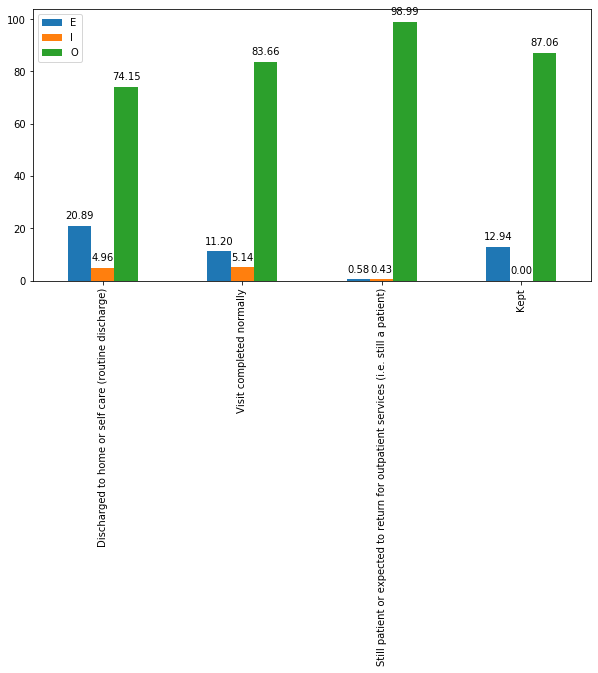

In [106]:

index=['Discharged to home or self care (routine discharge)', 'Visit completed normally', 'Still patient or expected to return for outpatient services (i.e. still a patient)','Kept']
                   
df = pd.DataFrame({'E': E,
                   'I': I,'O':O}, index=index)
ax=df.plot.bar(rot=90, figsize=(10,5))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [60]:
df1=pd.DataFrame(df1)
df1

,DISCHARGE_DISPOSITION
Discharged to home or self care (routine discharge),50.362948
Visit completed normally,41.792475
Still patient or expected to return for outpatient services (i.e. still a patient),3.400060
Kept;Visit completed normally,1.589589
Kept,1.204501
Discharged/transferred to skilled nursing facility (SNF),0.466931
Discharged/transferred to another short term general hospital for inpatient care,0.235502
Left against medical advice or discontinued care,0.218944
Discharged/transferred to home under care of organized home health service organization,0.209740
Discharged/transferred to another type of institution for inpatient care or referred for outpatient,0.110565


## Explaination of OVERDOSE_FLAG

In [66]:
OVERDOSE_FLAG_df= pd.read_csv(file_path, usecols=['OVERDOSE_FLAG'])

In [67]:
pandas_profiling.ProfileReport(OVERDOSE_FLAG_df)

Number of variables,1
Number of observations,30419090
Total Missing (%),0.0%
Total size in memory,232.1 MiB
Average record size in memory,8.0 B
Numeric,0
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## Explaination of OD_TERMS

In [102]:
OD_TERMS_df= pd.read_csv(file_path, usecols=['OD_TERMS'])

In [92]:
def new_val(each):
    each=str(each)
    
    each_list = each.split(";")
    each_list_set=set(each_list)
    if len(each_list_set)==1:
        return each_list[0]
    else:
        if '\n' in each_list_set:
            each_list=remove_values_from_list(each_list,'\n')
            return ';'.join(each_list)
            

In [93]:
OD_TERMS_df['OD_TERMS'] = OD_TERMS_df['OD_TERMS'].apply(lambda x: new_val(x))

##### Percentage of Missing value

In [103]:
OD_TERMS_df.isnull().sum()*100/len(OD_TERMS_df)

OD_TERMS    99.869365
dtype: float64

In [95]:
def s(k):
    if k=='over dose' or k=='over-dose':
        return 'overdose'
    if k in ['altered\nmental status','altered mental\nstatus','altered mental \nstatus','altered mental \n\nstatus','altered\n\nmental status']:
        return 'altered mental status'
    if k in ['poison','poisoning','poisoned']:
        return 'poison'
    else:
        return k

In [96]:
OD_TERMS_df['OD_TERMS'] = OD_TERMS_df['OD_TERMS'].apply(lambda x: s(x))

In [97]:
OD_TERMS_df['OD_TERMS'].value_counts()

nan                      30379352
overdose                    23861
altered mental status        9128
od                           2561
poison                       2091
unresponsiveness              362
snort                         212
intox                          46
nodding off                     3
loss of of                      1
Name: OD_TERMS, dtype: int64

In [98]:
df1=OD_TERMS_df['OD_TERMS'].value_counts(normalize=True)*100


In [99]:
df1=pd.DataFrame(df1)
df1

,OD_TERMS
nan,99.874201
overdose,0.078445
altered mental status,0.030009
od,0.008419
poison,0.006874
unresponsiveness,0.001190
snort,0.000697
intox,0.000151
nodding off,0.000010
loss of of,0.000003


## Explaination of OD_DRUG_TERMS

In [100]:
OD_DRUG_TERMS_df= pd.read_csv(file_path, usecols=['OD_DRUG_TERMS'])

##### Percentage of Missing value

In [104]:
OD_DRUG_TERMS_df.isnull().sum()*100/len(OD_DRUG_TERMS_df)

OD_DRUG_TERMS    99.869365
dtype: float64

In [105]:
df1=OD_DRUG_TERMS_df['OD_DRUG_TERMS'].value_counts(normalize=True)*100
df1=pd.DataFrame(df1)
df1

,OD_DRUG_TERMS
overdose,48.243495
altered mental status,19.049776
overdose;overdose,8.090493
od,5.664603
poison,3.945845
altered mental status;altered mental status,2.337813
overdose;overdose;overdose,1.935175
overdose;overdose;overdose;overdose,0.797725
unresponsiveness,0.790176
altered mental status;altered mental status;altered mental status,0.664352


In [107]:
OD_DRUG_TERMS_df['OD_DRUG_TERMS'] = OD_DRUG_TERMS_df['OD_DRUG_TERMS'].apply(lambda x: new_val(x))

In [108]:
OD_DRUG_TERMS_df['OD_DRUG_TERMS'] = OD_DRUG_TERMS_df['OD_DRUG_TERMS'].apply(lambda x: s(x))

In [111]:
df1=OD_DRUG_TERMS_df['OD_DRUG_TERMS'].value_counts(normalize=True)*100


In [112]:
df1=pd.DataFrame(df1)
df1

,OD_DRUG_TERMS
nan,99.874201
overdose,0.078445
altered mental status,0.030009
od,0.008419
poison,0.006874
unresponsiveness,0.001190
snort,0.000697
intox,0.000151
nodding off,0.000010
loss of of,0.000003


## Explaination of OD_AR_FLAG by unique patients

In [113]:
OD_AR_FLAG_df= pd.read_csv(file_path, usecols=['OD_AR_FLAG'])

In [114]:
pandas_profiling.ProfileReport(OD_AR_FLAG_df)

Number of variables,1
Number of observations,30419090
Total Missing (%),0.0%
Total size in memory,232.1 MiB
Average record size in memory,8.0 B
Numeric,0
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [ ]:
## Explaination of ADVERSE_OPIOID_EVENT_FLAG

In [115]:
ADVERSE_OPIOID_EVENT_FLAG_df= pd.read_csv(file_path, usecols=['ADVERSE_OPIOID_EVENT_FLAG'])

In [116]:
pandas_profiling.ProfileReport(OD_AR_FLAG_df)

Number of variables,1
Number of observations,30419090
Total Missing (%),0.0%
Total size in memory,232.1 MiB
Average record size in memory,8.0 B
Numeric,0
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## Explaination of ADVERSE_OPIOID_EVENT_FLAG

In [117]:
ADVERSE_OPIOID_EVENT_FLAG_df= pd.read_csv(file_path, usecols=['ADVERSE_OPIOID_EVENT_FLAG'])

In [118]:
pandas_profiling.ProfileReport(ADVERSE_OPIOID_EVENT_FLAG_df)

Number of variables,1
Number of observations,30419090
Total Missing (%),99.7%
Total size in memory,232.1 MiB
Average record size in memory,8.0 B
Numeric,0
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## Explaination of ADVERSE_OPIOID_EVENT_DRUGS

In [121]:
ADVERSE_OPIOID_EVENT_DRUGS_df= pd.read_csv(file_path, usecols=['ADVERSE_OPIOID_EVENT_DRUGS'])

In [122]:
ADVERSE_OPIOID_EVENT_DRUGS_df.isnull().sum()*100/len(ADVERSE_OPIOID_EVENT_DRUGS_df)

## update with percentage

ADVERSE_OPIOID_EVENT_DRUGS    99.707539
dtype: float64

In [ ]:
df1=OD_DRUG_TERMS_df['OD_DRUG_TERMS'].value_counts(normalize=True)*100


In [125]:
df1=ADVERSE_OPIOID_EVENT_DRUGS_df['ADVERSE_OPIOID_EVENT_DRUGS'].value_counts(normalize=True)*100
df1=pd.DataFrame(df1)
df1

,ADVERSE_OPIOID_EVENT_DRUGS
opioid,32.171440
narcotic,31.512747
opiate,20.204802
methadone,2.356009
pain medication,1.452273
hydrocodone,1.361225
polypharmacy,1.324131
percocet,1.131919
vicodin,1.065600
morphine,0.926217


## Explaination of ADVERSE_OPIOID_EVENT_DRUGS

In [126]:
ADVERSE_OPIOID_EVENT_PROBLEMS_df= pd.read_csv(file_path, usecols=['ADVERSE_OPIOID_EVENT_PROBLEMS'])

In [127]:
ADVERSE_OPIOID_EVENT_PROBLEMS_df.isnull().sum()*100/len(ADVERSE_OPIOID_EVENT_PROBLEMS_df)
## get %

ADVERSE_OPIOID_EVENT_PROBLEMS    99.707539
dtype: float64

In [134]:
def n_val(each):
    each=str(each)
    if each=='dependence' or each=='dependance' or each=='dependency':
        return 'dependence'
    if each=='drug-seeking' or each=='drug seeking':
        return 'drug seeking'
    
    each_list = each.split(";")
    each_list=sorted(each_list)
    each_list_set=set(each_list)
    if len(each_list_set)==1:
        return each_list[0]
    return each

In [135]:
ADVERSE_OPIOID_EVENT_PROBLEMS_df['ADVERSE_OPIOID_EVENT_PROBLEMS'] = ADVERSE_OPIOID_EVENT_PROBLEMS_df['ADVERSE_OPIOID_EVENT_PROBLEMS'].apply(lambda x: n_val(x))

In [136]:
df1=ADVERSE_OPIOID_EVENT_PROBLEMS_df['ADVERSE_OPIOID_EVENT_PROBLEMS'].value_counts(normalize=True)*100


In [137]:
df1=pd.DataFrame(df1)
df1

,ADVERSE_OPIOID_EVENT_PROBLEMS
nan,99.707539
dependence,0.127203
abuse,0.073043
overdose,0.034728
addiction,0.030247
dependent,0.004047
overuse,0.002212
drug seeking,0.002022
od,0.001880
misuse,0.001732


# Insurance

In [7]:
df_Insurance= pd.read_csv(file_path, usecols=['COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG'])

In [8]:
df_Insurance.head(5)

,COMMERCIAL_FLAG,OTHERGOV_FLAG,SELFPAY_FLAG,WORKERSCOMP_FLAG,INSTITUTIONALIZED_FLAG,CHARITY_FLAG,MEDICARE_FLAG,MEDICAID_FLAG,LIFE_FLAG,MDWISE_FLAG,NODATA_FLAG
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0


In [11]:
pandas_profiling.ProfileReport(df_Insurance)

Number of variables,11
Number of observations,30419090
Total Missing (%),0.0%
Total size in memory,2.5 GiB
Average record size in memory,88.0 B
Numeric,0
Categorical,0
Boolean,11
Date,0
Text (Unique),0
Rejected,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
No = [21406244, 30285409, 29944523, 30347818, 30414380,30414990,21662850,27291646,30393404,29949190,19813311]
Yes = [9012846,133681,474567,71272,4710,4100,8756240,3127444,25686,469900,10605779]

In [4]:
for i in range(len(No)):
    No[i]=No[i]*100/30419090
    Yes[i]=Yes[i]*100/30419090

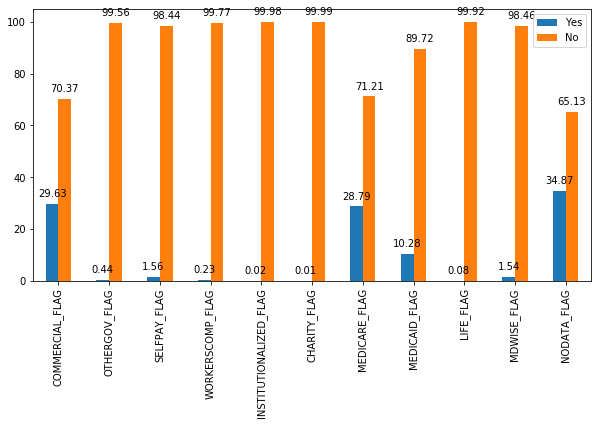

In [29]:
for i in range(len(No)):
    No[i]=No[i]*100/30419090
    Yes[i]=Yes[i]*100/30419090
index=['COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG','WORKERSCOMP_FLAG','INSTITUTIONALIZED_FLAG','CHARITY_FLAG',
                                                 'MEDICARE_FLAG','MEDICAID_FLAG','LIFE_FLAG','MDWISE_FLAG','NODATA_FLAG']
                   
df = pd.DataFrame({'Yes': Yes,
                   'No': No}, index=index)
ax=df.plot.bar(rot=90, figsize=(10,5))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [2]:
import pandas as pd

In [3]:
df_Insurance= pd.read_csv(file_path, usecols=['COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG'])

NameError: name 'file_path' is not defined

##### 

In [92]:
sum_row = df_Insurance.sum(axis=1)

In [86]:
sum_row.unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [96]:
sum_row=pd.DataFrame(sum_row)

In [97]:
sum_row.head(5)

,0
0,0
1,1
2,1
3,1
4,1


In [104]:
sum_row=sum_row.rename(columns={0: "C1"})

In [106]:
df1=sum_row['C1'].value_counts()
df1=pd.DataFrame(df1)
df1

,C1
1,25011510
2,3427926
0,1706720
3,272873
4,61


In [105]:
df1=sum_row['C1'].value_counts(normalize=True)*100
df1=pd.DataFrame(df1)
df1

,C1
1,82.223071
2,11.268996
0,5.610687
3,0.897045
4,0.000201


##### Having all the insurance

In [4]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==0) & (df_Insurance['OTHERGOV_FLAG']==0) &
                  (df_Insurance['SELFPAY_FLAG']==0)
                 & (df_Insurance['WORKERSCOMP_FLAG']==0) & (df_Insurance['INSTITUTIONALIZED_FLAG']==0)& (df_Insurance['CHARITY_FLAG']==0)
                  & (df_Insurance['MEDICARE_FLAG']==0)& (df_Insurance['MEDICAID_FLAG']==0)
                  & (df_Insurance['LIFE_FLAG']==0) & (df_Insurance['MDWISE_FLAG']==0) & (df_Insurance['NODATA_FLAG']==1)]

NameError: name 'df_Insurance' is not defined

In [59]:
len(df)

0

In [60]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['OTHERGOV_FLAG']==1) &
                  (df_Insurance['SELFPAY_FLAG']==1)
                 & (df_Insurance['WORKERSCOMP_FLAG']==1) & (df_Insurance['INSTITUTIONALIZED_FLAG']==1)& (df_Insurance['CHARITY_FLAG']==1)
                  & (df_Insurance['MEDICARE_FLAG']==1)& (df_Insurance['MEDICAID_FLAG']==1)
                  & (df_Insurance['LIFE_FLAG']==1) & (df_Insurance['MDWISE_FLAG']==1)]
len(df)

0

In [61]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['OTHERGOV_FLAG']==1) &
                  (df_Insurance['SELFPAY_FLAG']==1)
                 & (df_Insurance['WORKERSCOMP_FLAG']==1) & (df_Insurance['INSTITUTIONALIZED_FLAG']==1)& (df_Insurance['CHARITY_FLAG']==1)
                  & (df_Insurance['MEDICARE_FLAG']==1)& (df_Insurance['MEDICAID_FLAG']==1)
                  & (df_Insurance['LIFE_FLAG']==1)]
len(df)

0

##### Number of Visits with COMMERCIAL_FLAG and INSTITUTIONALIZED_FLAG

In [37]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['INSTITUTIONALIZED_FLAG']==1)]

In [38]:
len(df)

7

##### Number of Visits with COMMERCIAL_FLAG and MEDICARE_FLAG

In [44]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['MEDICARE_FLAG']==1)]


In [45]:
len(df)

944019

##### Number of Visits with COMMERCIAL_FLAG and MDWISE_FLAG

In [46]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['MDWISE_FLAG']==1)]
len(df)

23046

#### Number of Visits with COMMERCIAL_FLAG and LIFE_FLAG

In [47]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['LIFE_FLAG']==1)]
len(df)

5519

##### Number of Visits with COMMERCIAL_FLAG and MEDICAID_FLAG

In [48]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['MEDICAID_FLAG']==1)]
len(df)

708976

##### Number of Visits with COMMERCIAL_FLAG and WORKERSCOMP_FLAG

In [52]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['WORKERSCOMP_FLAG']==1)]
len(df)

61

##### Number of Visits with COMMERCIAL_FLAG and OTHERGOV_FLAG

In [53]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['OTHERGOV_FLAG']==1)]
len(df)

195

##### Number of Visits with COMMERCIAL_FLAG and SELFPAY_FLAG

In [55]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['SELFPAY_FLAG']==1)]
len(df)

915

In [ ]:
df_Insurance= pd.read_csv(file_path, usecols=['COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG'])

##### Number of Visits with MEDICARE_FLAG and MEDICAID_FLAG

In [62]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['MEDICAID_FLAG']==1)]
len(df)

24655

##### Number of Visits with MEDICARE_FLAG and MDWISE_FLAG

In [63]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['MDWISE_FLAG']==1)]
len(df)

66

##### Number of Visits with MEDICARE_FLAG and LIFE_FLAG

In [64]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['LIFE_FLAG']==1)]
len(df)

641

##### Number of Visits with MEDICARE_FLAG and SELFPAY_FLAG

In [66]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['SELFPAY_FLAG']==1)]
len(df)

297

##### Number of Visits with MEDICARE_FLAG and INSTITUTIONALIZED_FLAG

In [67]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['INSTITUTIONALIZED_FLAG']==1)]
len(df)

0

##### Number of Visits with MEDICARE_FLAG and WORKERSCOMP_FLAG

In [70]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['WORKERSCOMP_FLAG']==1)]
len(df)

12

##### Number of Visits with MEDICARE_FLAG and CHARITY_FLAG

In [71]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['CHARITY_FLAG']==1)]
len(df)

0

##### Number of Visits with MEDICAID_FLAG and SELFPAY_FLAG

In [72]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['SELFPAY_FLAG']==1)]
len(df)

1136

##### Number of Visits with MEDICAID_FLAG and INSTITUTIONALIZED_FLAG

In [73]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['INSTITUTIONALIZED_FLAG']==1)]
len(df)

17

##### Number of Visits with MEDICAID_FLAG and WORKERSCOMP_FLAG

In [74]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['WORKERSCOMP_FLAG']==1)]
len(df)

233

##### Number of Visits with MEDICAID_FLAG and CHARITY_FLAG

In [75]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['CHARITY_FLAG']==1)]
len(df)

3

##### Number of Visits with MEDICAID_FLAG and NODATA_FLAG

In [76]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

358142

In [ ]:
'COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG']

##### Number of Visits with COMMERCIAL_FLAG and NODATA_FLAG

In [78]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

959616

##### Number of Visits with SELFPAY_FLAG and NODATA_FLAG

In [79]:
df = df_Insurance[(df_Insurance['SELFPAY_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

21649

##### Number of Visits with WORKERSCOMP_FLAG and NODATA_FLAG

In [80]:
df = df_Insurance[(df_Insurance['WORKERSCOMP_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

6716

##### Number of Visits with INSTITUTIONALIZED_FLAG and NODATA_FLAG

In [81]:
df = df_Insurance[(df_Insurance['INSTITUTIONALIZED_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

236

##### Number of Visits with CHARITY_FLAG and NODATA_FLAG

In [82]:
df = df_Insurance[(df_Insurance['CHARITY_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

92

##### Number of Visits with LIFE_FLAG and NODATA_FLAG

In [83]:
df = df_Insurance[(df_Insurance['LIFE_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

3218

##### Number of Visits with LIFE_FLAG and CHARITY_FLAG

In [84]:
df = df_Insurance[(df_Insurance['LIFE_FLAG']==1) & (df_Insurance['CHARITY_FLAG']==1)]
len(df)

0

In [107]:
arr=['COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG']

##### Combination of 3 flags

In [123]:
from itertools import combinations 
  
k=list(combinations(arr, 3)) 


In [124]:
k

[('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'WORKERSCOMP_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'INSTITUTIONALIZED_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'CHARITY_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'MEDICARE_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'MEDICAID_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'LIFE_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'MDWISE_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'NODATA_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'INSTITUTIONALIZED_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'CHARITY_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'MEDICARE_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'MEDICAID_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'LIFE_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'MDWISE_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'NODATA_FLAG'),
 ('COMMERCIAL_FLAG', 'WORKERSCOMP_FLAG', 'INSTITUTI

In [126]:
for i,j,m in k[:10]:
    
    print(i,j,m)
    df = df_Insurance[(df_Insurance[i]==1) & (df_Insurance[j]==1) & (df_Insurance[m]==1)]
    print(len(df))

COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG INSTITUTIONALIZED_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG CHARITY_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG MEDICARE_FLAG
5
COMMERCIAL_FLAG OTHERGOV_FLAG MEDICAID_FLAG
14
COMMERCIAL_FLAG OTHERGOV_FLAG LIFE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG MDWISE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG NODATA_FLAG
83
COMMERCIAL_FLAG SELFPAY_FLAG WORKERSCOMP_FLAG
0


In [127]:
from itertools import combinations 
  
k_4=list(combinations(arr, 4)) 


In [130]:
len(k_4)

330

In [129]:
for a,b,c,d in k_4[:60]:
    
    print(a,b,c,d)
    df = df_Insurance[(df_Insurance[a]==1) & (df_Insurance[b]==1) & (df_Insurance[c]==1) & (df_Insurance[d]==1)]
    print(len(df))

COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG WORKERSCOMP_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG INSTITUTIONALIZED_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG CHARITY_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG MEDICARE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG MEDICAID_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG LIFE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG MDWISE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG NODATA_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG INSTITUTIONALIZED_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG CHARITY_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG MEDICARE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG MEDICAID_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG LIFE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG MDWISE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG NODATA_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG INSTITUTIONALIZED_FLAG CHARITY_FLAG
0
COMMERCIAL_FLAG 